### Case Study on ANOVA

**XYZ Company has offices in four different zones. The company wishes to investigate the following:  
● The mean sales generated by each zone.  
● Total sales generated by all the zones for each month.  
● Check whether all the zones generate the same amount of sales.  
Help the company to carry out their study with the help of data provided.**

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
#sample datafile
datafile = "Sales_data_zone_wise.csv"

In [3]:
#reading the sample dataset to pandas DataFrame
data = pd.read_csv(datafile)

In [4]:
data.head(5)

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [5]:
data.columns

Index(['Month', 'Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'], dtype='object')

In [6]:
#understanding datatypes in the sample dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


### The mean sales generated by each zone.

In [7]:
#pd.set_option('display.float_format', lambda x: '%.2f' % x)
data.describe().applymap(lambda x: f"{x:0.2f}")

,Zone - A,Zone - B,Zone - C,Zone - D
count,29.00,29.00,29.00,29.00
mean,1540493.14,1755559.59,1772871.03,1842926.76
std,261940.06,168389.89,333193.72,375016.48
min,1128185.00,1527574.00,1237722.00,1234311.00
25%,1305972.00,1606010.00,1523308.00,1520406.00
50%,1534390.00,1740365.00,1767047.00,1854412.00
75%,1820196.00,1875658.00,2098463.00,2180416.00
max,2004480.00,2091194.00,2290580.00,2364132.00


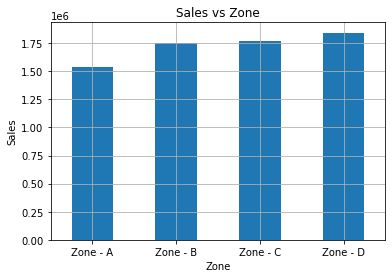

In [8]:
#barchart of mean sales by zones
data_x = data.iloc[:,[1,2,3,4]].mean()
data_x.plot(kind='bar')
plt.xlabel('Zone')
plt.ylabel('Sales')
plt.title('Sales vs Zone')
plt.xticks(rotation =0)
plt.grid()

Comments:-  
  -  Mean Sales - Zone A = 1540493.14
  -  Mean Sales - Zone B = 1755559.59
  -  Mean Sales - Zone C = 1772871.03
  -  Mean Sales - Zone D = 1842926.76

   index     zones    sales
0      0  Zone - A  1483525
1      1  Zone - A  1238428
2      2  Zone - A  1860771
3      3  Zone - A  1871571
4      4  Zone - A  1244922
     index     zones    sales
111     24  Zone - D  1695122
112     25  Zone - D  1520406
113     26  Zone - D  1289160
114     27  Zone - D  2178267
115     28  Zone - D  1854412


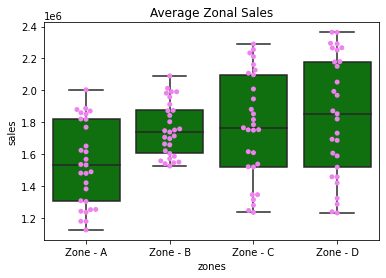

In [9]:
#reshape the dataframe suitable for statsmodels package 
data_melt = pd.melt(data.reset_index(), id_vars=['index'], value_vars=['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'])
# replace column names
data_melt.columns = ['index', 'zones', 'sales']
print(data_melt.head(5))
print(data_melt.tail(5))

# generate a boxplot to see the data distribution by zones
ax = sns.boxplot(x='zones', y='sales', data=data_melt, color='green')
ax = sns.swarmplot(x='zones', y='sales', data=data_melt, color='violet')
plt.title('Average Zonal Sales')
plt.show()

Comments:-  
    Average zonal sales can be obtained from the box plot for each zone.  
    Zone-A has the least average sales.  
    Zone-D has the largest average sales.

### Assumption checks for ANOVA

In [10]:
#assumption checks:-
#1. populations/residuals are normally distributed
#2. samples must be independent
#3. variances between groups are equal or almost equal
#4. dependant variable should be continuous

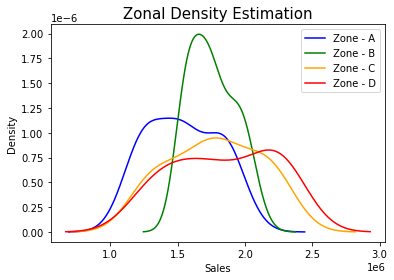

In [11]:
#normal distribution check
#kde plot
data[['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D']].plot.kde(color = ["blue", "green", "orange", "red"])
plt.title("Zonal Density Estimation", fontsize = 15)
plt.xlabel('Sales')
plt.show()

Comments:-
    
The distribution looks approximately normal and suggests that residuals are almost normally distributed

In [12]:
#homogeneity of assumption variance check
#calculate ratio of the largest to the smallest sample standard deviation
ratio = data.std().max() / data.std().min()
print("Ratio of standard deviation: ", ratio)

Ratio of standard deviation:  2.22707247226732


In [13]:
#Data points in a normal distribution are more likely to fall closer to the mean
#68% of all data points will be within ±1SD from the mean
#95% of all data points will be within ±2SD from the mean
#99% of all data points will be within ±3SD from the mean

In [14]:
#The ratio of the largest to the smallest sample standard deviation is 2.22
#That is less than the threshold of 3
#Thus we conclude that the assumptions are fulfilled to perform ANOVA testing

### Total sales generated by all the zones for each month.

In [15]:
#Total sales calculation and adding a new column 'Total Sales' to DataFrame
SumOfRows = data.sum(axis=1)
totalSum = np.array(SumOfRows)
data['Total Sales'] = totalSum.tolist()
data

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total Sales
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328
5,Month - 6,1534390,1573128,1751825,2292044,7151387
6,Month - 7,1820196,1992031,1786826,1688055,7287108
7,Month - 8,1625696,1665534,2161754,2363315,7816299
8,Month - 9,1652644,1873402,1755290,1422059,6703395
9,Month - 10,1852450,1913059,1754314,1608387,7128210


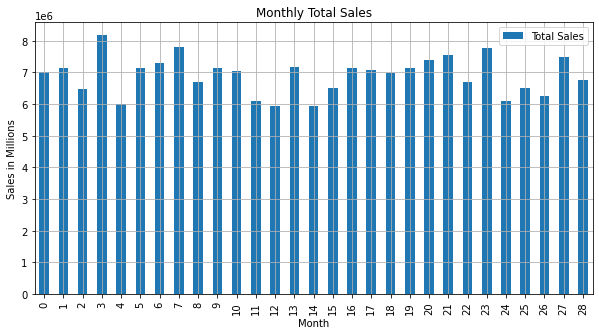

In [16]:
#barchart of Monthly Total Sales
data_x = data.iloc[:,[5]]
data_x.plot(kind='bar', figsize=(10,5))
plt.xticks(rotation = 90)
plt.xlabel('Month')
plt.ylabel('Sales in Millions')
plt.title('Monthly Total Sales')
plt.grid()

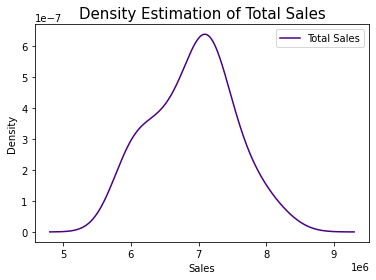

In [17]:
#kde plot
data[['Total Sales']].plot.kde(color = 'indigo')
plt.title("Density Estimation of Total Sales", fontsize = 15)
plt.xlabel('Sales')
plt.show()

Comments:-  
    Normal Distribution

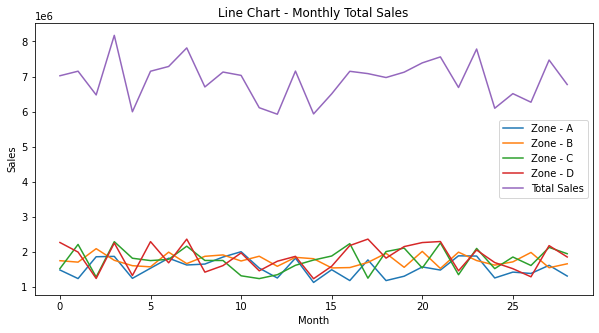

In [18]:
#line chart
data_x = data.iloc[:,[1,2,3,4,5]]
data_x.plot(kind='line', figsize=(10,5))
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Line Chart - Monthly Total Sales')
plt.xticks(rotation = 0)
plt.show()

Comments:-  
    Zone B monthly sales has significant pattern resemblance with total monthly sales.  

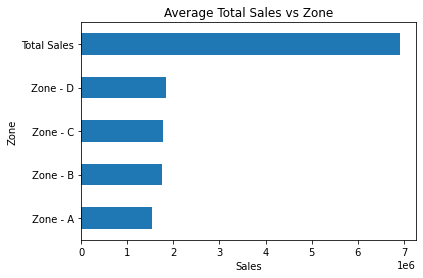

In [19]:
#Average Sales
data_x = data.iloc[:,[1,2,3,4,5]].mean()
data_x.plot(kind='barh')
plt.xlabel('Sales')
plt.ylabel('Zone')
plt.title('Average Total Sales vs Zone')
plt.xticks(rotation =0)
plt.show()

Comments:-  
    Zones B, C & D have nearly 2 Million monthly sales 

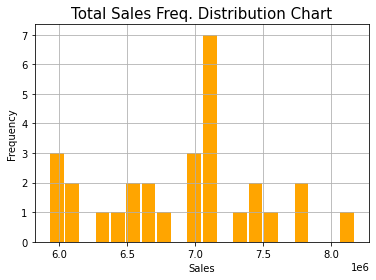

In [20]:
#Total sales frequency distribution chart
x = data['Total Sales']
plt.hist(x, bins = 20, rwidth = 0.9,  color = 'orange')
plt.title('Total Sales Freq. Distribution Chart', fontsize = 15)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid()

Comments:-  
    Total Sales for each month varies between 5.9 Million & 8.2 Million.  
    Average Sales is 7 Million

### Check whether all the zones generate the same amount of sales.

In [21]:
#ANOVA test is used to compare the means of more than 2 groups
#ANOVA uses variance-based F test to check the group mean equality

In [22]:
#ANOVA Hypothesis Testing

#Null hypothesis: Groups means are equal (no variation in means of groups)
#H₀: μ₁= μ₂ = μ₃ = .....

#Alternative hypothesis: At least, one group mean is different from other groups
#H₁: Not all means are equal
#significance level, α = 0.05

In [23]:
from scipy.stats import f_oneway

In [24]:
a, b, c, d = data.iloc[:,[1]], data.iloc[:,[2]], data.iloc[:,[3]], data.iloc[:,[4]]

In [25]:
F, p = f_oneway(a, b, c, d)
print('F-Statistic=%.3f, p=%.3f' % (F, p))

F-Statistic=5.672, p=0.001


**Conclusion:-  
We see that p-value <0.05  
Hence, we can reject the Null Hypothesis – therefore, it can be concluded that sales in different zones are not same.**

In [26]:
#scipy.stats.f.ppf(q, dfn, dfd)
#q = 0.95 for p = 0.05
#degrees of freedom(numerator) = 4-1 = 3
#degrees of freedom(denominator) = 116-4 = 112
#if f-statistic > f-critical, then the results of the test are statistically significant
#so reject null hypothesis

In [27]:
#comparing f-statistic with f-critical value
fc = stats.f.ppf(0.95, 3, 112)
print("f-critical:", fc)

f-critical: 2.6856434512366034


**Comments:-  
f-statistic(5.672) > f-critical(2.685); then the results of the test are statistically significant.  
So, alternative hypothesis is accepted.**

In [28]:
#ANOVA table using bioinfokit
#from bioinfokit.analys import stat
#res = stat()
#res.anova_stat(data=data_melt, res_var='sales', anova_model='sales ~ C(zones)')
#res.anova_summary

In [29]:
#get ANOVA table as R like output

#import statsmodels.api as sm
#from statsmodels.formula.api import ols

#Ordinary Least Squares (OLS) model
model = ols('sales ~ C(zones)', data=data_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq     df         F    PR(>F)
C(zones)  1.483058e+12    3.0  5.672056  0.001183
Residual  9.761449e+12  112.0       NaN       NaN


**Comments:-  
    From OLS model, f-statistic value is 5.672 and p-value is 0.001.  
    f-statistic(5.672) > f-critical(2.685) & p-value(0.001) is less than alpha value(0.05).  
    Null hypothesis is insignificant.
    So, alternative hypothesis is accepted; not all means are equal.  
    Therefore, it can be concluded that Average Zonal Sales are not equal.**